<a href="https://colab.research.google.com/github/leonardor1945/leonardor1945/blob/main/LCHI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
install.packages("BiocManager")
BiocManager::install("dada2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'dada2'”
Old packages: 'evaluate', 'foreign', 'openssl', 'Rcpp', 'testthat'



In [8]:
BiocManager::install("phyloseq")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'phyloseq'”
Old packages: 'evaluate', 'foreign', 'openssl', 'Rcpp', 'testthat'



In [9]:
install.packages(c("ggplot2", "pheatmap", "vegan", "VennDiagram"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
# Cargar librerías
library(dada2)
library(phyloseq)
library(ggplot2)
library(pheatmap)
library(vegan)
library(VennDiagram)
library(Biostrings)

In [11]:
list.files()

[1] "HMP_MOCK.v35.fasta" "LCHI01_1.fastq.gz"  "LCHI01_2.fastq.gz" 
 [4] "LCHI02_1.fastq.gz"  "LCHI02_2.fastq.gz"  "LCHI03_1.fastq.gz" 
 [7] "LCHI03_2.fastq.gz"  "LCHI04_1.fastq.gz"  "LCHI04_2.fastq.gz" 
[10] "LCHI05_1.fastq.gz"  "LCHI05_2.fastq.gz"  "LCHI06_1.fastq.gz" 
[13] "LCHI06_2.fastq.gz"  "LCHI07_1.fastq.gz"  "LCHI07_2.fastq.gz" 
[16] "LCHI08_1.fastq.gz"  "LCHI08_2.fastq.gz"  "LCHI09_1.fastq.gz" 
[19] "LCHI09_2.fastq.gz"  "LCHI10_1.fastq.gz"  "LCHI10_2.fastq.gz" 
[22] "LCHI11_1.fastq.gz"  "LCHI11_2.fastq.gz"  "LCHI12_1.fastq.gz" 
[25] "LCHI12_2.fastq.gz"  "LCHI13_1.fastq.gz"  "LCHI13_2.fastq.gz" 
[28] "Mock_1.fastq.gz"    "Mock_2.fastq.gz"    "sample_data"

In [12]:
# Getting ready
fnFs <- sort(list.files(pattern="_1.fastq", full.names = TRUE))  # Forward reads
fnRs <- sort(list.files(pattern="_2.fastq", full.names = TRUE))  # Reverse reads
sample.names <- sapply(strsplit(basename(fnFs), "_"), `[`, 1)  # Nombres de muestras
sample.names <- sapply(strsplit(basename(fnRs), "_"), `[`, 1)

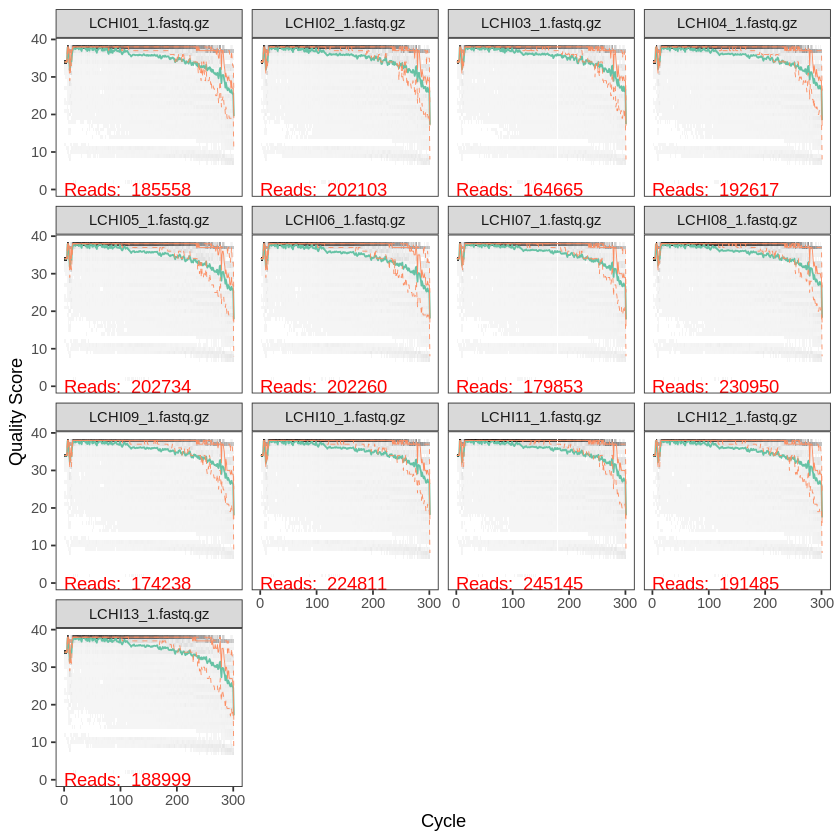

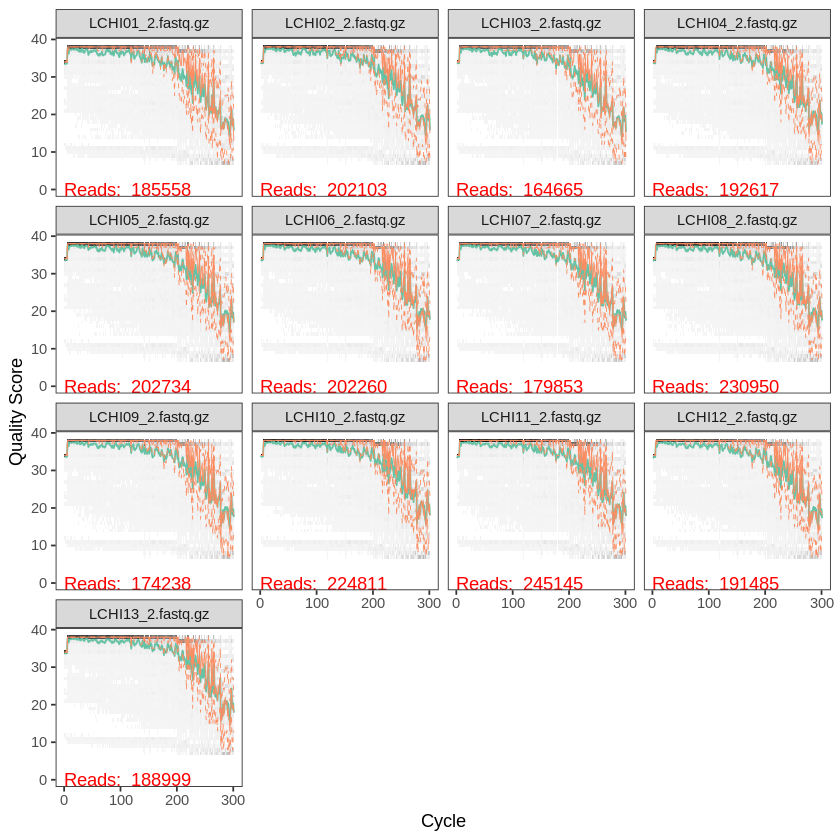

In [13]:
# Inspect read quality profiles
plotQualityProfile(fnFs[1:13])  # Inspeccionar calidad de lecturas forward
plotQualityProfile(fnRs[1:13])  # Inspeccionar calidad de lecturas reverse

In [15]:
# Filter and trim
filtFs <- file.path("filtered", paste0(sample.names, "_F_filt.fastq.gz"))
filtRs <- file.path("filtered", paste0(sample.names, "_R_filt.fastq.gz"))
names(filtFs) <- sample.names
names(filtRs) <- sample.names
out <- filterAndTrim(fnFs, filtFs, fnRs, filtRs, truncLen=c(254, 204), maxN=0, maxEE=c(2, 2),
                     truncQ=2, rm.phix=TRUE, compress=TRUE, multithread=FALSE)
head(out)
write.csv(out, file.path(tablePath, "filtering_stats.csv"))

The filter removed all reads: filtered/Mock_F_filt.fastq.gz and filtered/Mock_R_filt.fastq.gz not written.

Some input samples had no reads pass the filter.



,reads.in,reads.out
LCHI01_1.fastq.gz,185558,153146
LCHI02_1.fastq.gz,202103,172511
LCHI03_1.fastq.gz,164665,141519
LCHI04_1.fastq.gz,192617,164771
LCHI05_1.fastq.gz,202734,170036
LCHI06_1.fastq.gz,202260,168149


ERROR: Error in eval(expr, p): object 'tablePath' not found


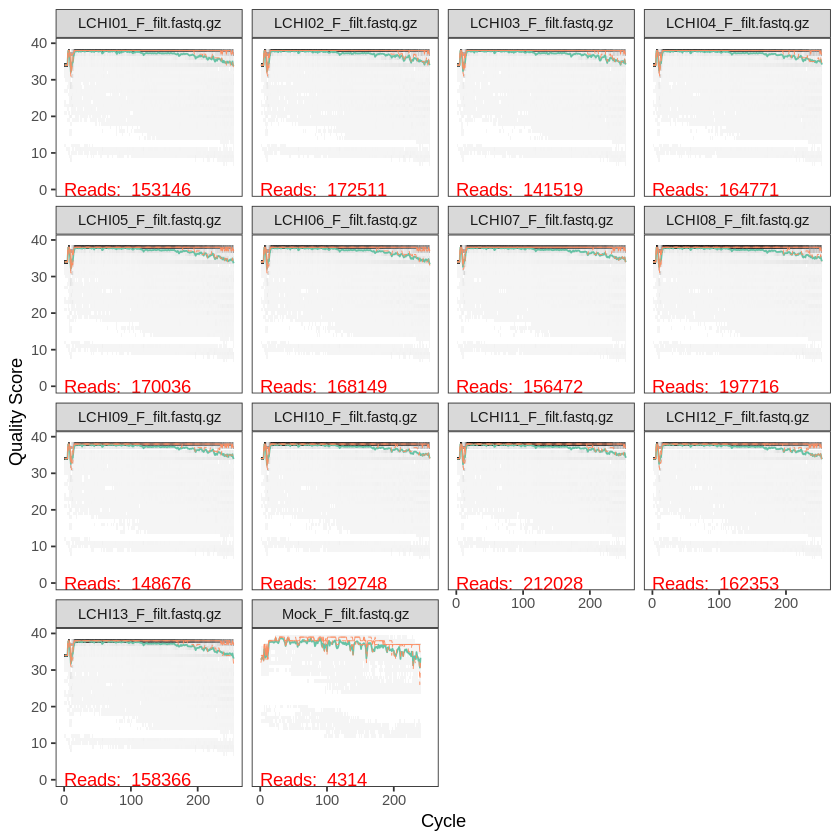

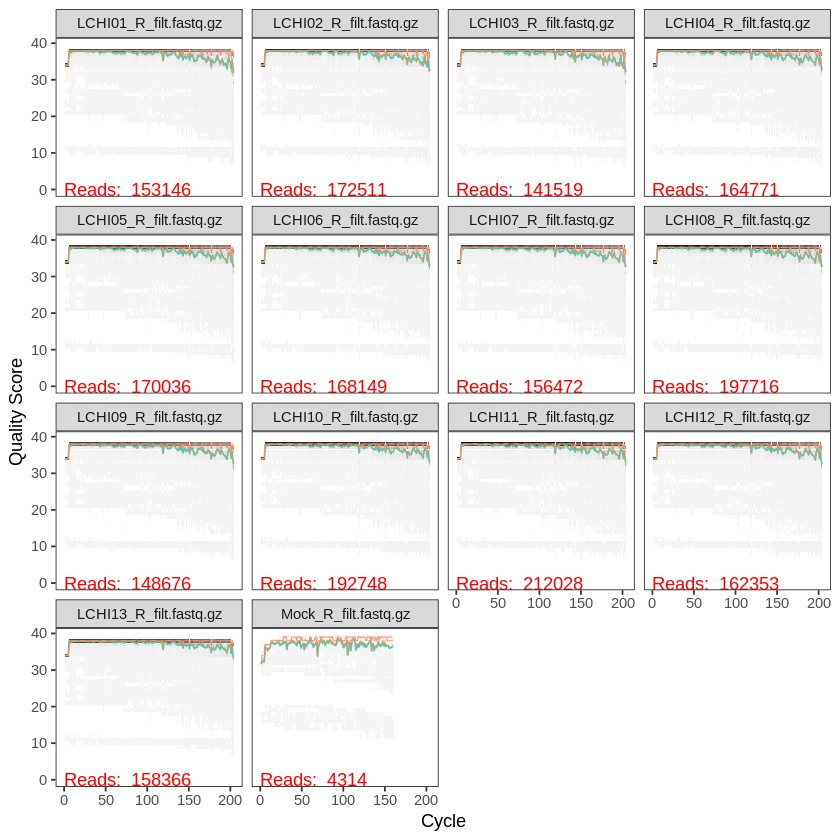

In [17]:
# Inspect read quality profiles after quality trimming
plotQualityProfile(filtFs[1:14])  # Inspeccionar calidad de lecturas forward
plotQualityProfile(filtRs[1:14])  # Inspeccionar calidad de lecturas reverse

In [ ]:
# Learn the Error Rates
errF <- learnErrors(filtFs, multithread=TRUE)
errR <- learnErrors(filtRs, multithread=TRUE)
plotErrors(errF, nominalQ=TRUE)
plotErrors(errR, nominalQ=TRUE)

In [ ]:
# Dereplication
derepFs <- derepFastq(filtFs, verbose=TRUE)
derepRs <- derepFastq(filtRs, verbose=TRUE)
# Name the derep-class objects by the sample names
names(derepFs) <- sample.names
names(derepRs) <- sample.names

In [ ]:
# Sample Inference
dadaFs <- dada(derepFs, err=errF, multithread=TRUE)
dadaRs <- dada(derepRs, err=errR, multithread=TRUE)
dadaFs[[1]]
dadaRs[[1]]

In [ ]:
# Merge paired reads
mergers <- mergePairs(dadaFs, derepFs, dadaRs, derepRs, verbose=TRUE)
# Inspect the merger data.frame from the first sample
head(mergers[[1]])

In [ ]:
# Construct sequence table
seqtab <- makeSequenceTable(mergers)
dim(seqtab)
# Inspect distribution of sequence lengths
table(nchar(getSequences(seqtab)))

In [ ]:
# Remove chimeras
seqtab.nochim <- removeBimeraDenovo(seqtab, method="consensus", multithread=TRUE, verbose=TRUE)
dim(seqtab.nochim)
sum(seqtab.nochim)/sum(seqtab)
write.csv(seqtab.nochim, file.path(tablePath, "seqtab_nochim_full.csv"))
seqtab_stats <- data.frame(
    Sample = rownames(seqtab.nochim),
    TotalReads = rowSums(seqtab.nochim),
    NumberASVs = rowSums(seqtab.nochim > 0),
    MeanReadsPerASV = rowMeans(seqtab.nochim[seqtab.nochim > 0]),
    MaxReads = apply(seqtab.nochim, 1, max)
)
write.csv(seqtab_stats, file.path(tablePath, "seqtab_nochim_stats.csv"), row.names = FALSE)

In [ ]:
# FASTA File
Archivo FASTA
fasta_file <- file.path(tablePath, "asv_sequences.fasta")
seqs <- colnames(seqtab.nochim)
names(seqs) <- paste0("ASV", seq(length(seqs)))
writeXStringSet(DNAStringSet(seqs), fasta_file)

In [ ]:
# Track reads through the pipeline
getN <- function(x) sum(getUniques(x))
track <- cbind(out, sapply(dadaFs, getN), sapply(dadaRs, getN), sapply(mergers, getN), rowSums(seqtab.nochim))
# If processing a single sample, remove the sapply calls: e.g. replace sapply(dadaFs, getN) with getN(dadaFs)
colnames(track) <- c("input", "filtered", "denoisedF", "denoisedR", "merged", "nonchim")
rownames(track) <- sample.names
head(track)
write.csv(track, file.path(tablePath, "read_tracking.csv"))
write.csv(track_pct, file.path(tablePath, "read_tracking_percent.csv"))

In [ ]:
# Assign taxonomy
taxa <- assignTaxonomy(seqtab.nochim, "~/tax/silva_nr_v128_train_set.fa.gz", multithread=TRUE)
taxa <- addSpecies(taxa, "~/tax/silva_species_assignment_v128.fa.gz")
taxa.print <- taxa # Removing sequence rownames for display only
rownames(taxa.print) <- NULL
head(taxa.print)
write.csv(taxa, file.path(tablePath, "taxonomy_assignments.csv"))

In [ ]:
# Evaluate accuracy
unqs.mock <- seqtab.nochim["Mock",]
unqs.mock <- sort(unqs.mock[unqs.mock>0], decreasing=TRUE) # Drop ASVs absent in the Mock
cat("DADA2 inferred", length(unqs.mock), "sample sequences present in the Mock community.\n")
mock.ref <- getSequences(file.path(path, "HMP_MOCK.v35.fasta"))

match.ref <- sum(sapply(names(unqs.mock), function(x) any(grepl(x, mock.ref))))
cat("Of those,", sum(match.ref), "were exact matches to the expected reference sequences.\n")

In [ ]:
# Create a Phyloseq Objet
# Crear metadata de muestras con la asignación regional
samdf <- data.frame(
    Sample = c("LCHI01", "LCHI02", "LCHI03", "LCHI04", "LCHI05",
               "LCHI06", "LCHI07", "LCHI08", "LCHI09", "LCHI10",
               "LCHI11", "LCHI12", "LCHI13"),
    Region = c(rep("Uru-Chipaya", 8), rep("Ayparawi", 5))  # LCHI01-08: Uru-Chipaya, LCHI09-13: Ayparawi
)

# Establecer los nombres de las filas
rownames(samdf) <- samdf$Sample

# Verificar que los nombres de las muestras coincidan con seqtab.nochim
if(!all(rownames(seqtab.nochim) %in% rownames(samdf))) {
    stop("No todas las muestras en seqtab.nochim están en los metadatos")
}

# Crear objeto phyloseq
ps <- phyloseq(
    otu_table(seqtab.nochim, taxa_are_rows=FALSE),
    sample_data(samdf),
    tax_table(taxa)
)

# Guardar el objeto phyloseq
saveRDS(ps, file.path(path, "phyloseq_object.rds"))

# Verificar la estructura del objeto phyloseq
print("Estructura del objeto phyloseq:")
ps

# Exportar la tabla de metadatos para verificación
write.csv(sample_data(ps), file.path(tablePath, "sample_metadata.csv"))

# Imprimir un resumen de las muestras por región
table(sample_data(ps)$Region)

In [ ]:
# Clean "Mock"
ps <- prune_samples(sample_names(ps) != "Mock", ps)

In [ ]:
# Alpha Diversity
alpha_div <- estimate_richness(ps, measures=c("Observed", "Shannon", "Simpson", "Chao1", "ACE"))
write.csv(alpha_div, file.path(tablePath, "alpha_diversity.csv"))
plot_richness(ps, x = "Sample", measures = c("Shannon", "Simpson", "Chao1", "ACE", "Observed"),
              title = "Alpha Diversity") +
  scale_x_discrete(labels = paste0(sample_names(ps))) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))  # Rótulos más legibles


In [ ]:
# Beta Diversity
# Realizar el análisis NMDS
ord_nmds <- ordinate(ps, method="NMDS", distance="bray")

# Graficar NMDS con elipse por región
nmds_plot <- plot_ordination(ps, ord_nmds, color="Region", title="NMDS - Bray-Curtis") +
  geom_point(size=4) +
  stat_ellipse(aes(color = Region), level = 0.95) +  # Elipse para cada región
  theme_minimal() +
  scale_color_manual(values = c("Uru-Chipaya" = "purple", "Ayparawi" = "cyan"))  # Colores para las regiones

# Mostrar la gráfica NMDS con elipse
print(nmds_plot)

# Realizar el análisis PCoA
ord_pcoa <- ordinate(ps, method="PCoA", distance="bray")

# Graficar PCoA con elipse por región
pcoa_plot <- plot_ordination(ps, ord_pcoa, color="Region", title="PCoA - Bray-Curtis") +
  geom_point(size=4) +
  stat_ellipse(aes(color = Region), level = 0.95) +  # Elipse para cada región
  theme_minimal() +
  scale_color_manual(values = c("Uru-Chipaya" = "purple", "Ayparawi" = "cyan"))  # Colores para las regiones

# Mostrar la gráfica PCoA con elipse
print(pcoa_plot)

In [ ]:
# Abundance
# 16. Barplots por filo, familia y género
plot_bar(ps, x="Sample", fill="Kingdom", title="Abundance by Kingdom")
plot_bar(ps, x="Sample", fill="Phylum", title="Abundance by Phylum")
plot_bar(ps, x="Sample", fill="Class", title="Abundance by Class")
plot_bar(ps, x="Sample", fill="Order", title="Abundancia by Order")
plot_bar(ps, x="Sample", fill="Family", title="Abundance by Family")
plot_bar(ps, x="Sample", fill="Genus", title="Abundance by Genus")

# 17. Transformación de las cuentas de muestras a abundancia relativa
# Transformar las cuentas para obtener la abundancia relativa de cada ASV en cada muestra (en porcentaje)
ps.relative <- transform_sample_counts(ps, function(OTU) OTU / sum(OTU) * 100)

    # 18. Obtener los TOTAL taxones más abundantes
top100 <- names(sort(taxa_sums(ps.relative), decreasing = TRUE))[1:1000]
top30 <- names(sort(taxa_sums(ps.relative), decreasing = TRUE))[1:30]

# 19. Crear un nuevo objeto phyloseq solo con los 30 taxones más abundantes
ps.top100 <- prune_taxa(top100, ps.relative)
ps.top30 <- prune_taxa(top30, ps.relative)

# 20. Generar el gráfico de barras
plot_bar(ps.top100, x = "Sample", fill = "Kingdom", title = "Relative Abundance by Kingdom") +
  ylab("Relative Abundance (%)") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
plot_bar(ps.top100, x = "Sample", fill = "Phylum", title = "Relative Abundance by Phylum") +
  ylab("Relative Abundance (%)") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
plot_bar(ps.top100, x = "Sample", fill = "Class", title = "Relative Abundance by Class") +
  ylab("Relative Abundance (%)") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
plot_bar(ps.top100, x = "Sample", fill = "Order", title = "Relative Abundance by Order") +
  ylab("Relative Abundance (%)") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
plot_bar(ps.top100, x = "Sample", fill = "Family", title = "Relative Abundance by Family") +
  ylab("Relative Abundance (%)") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
plot_bar(ps.top100, x = "Sample", fill = "Genus", title = "Relative Abundance by Genus") +
  ylab("Relative Abundance (%)") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

# 20. Generar el gráfico de barras
plot_bar(ps.top30, x = "Sample", fill = "Kingdom", title = "Abundance by Kingdom (Top 30)") +
  ylab("Relative Abundance (%)") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
plot_bar(ps.top30, x = "Sample", fill = "Phylum", title = "Abundance by Phylum (Top 30)") +
  ylab("Relative Abundance (%)") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
plot_bar(ps.top30, x = "Sample", fill = "Class", title = "Abundance by Class (Top 30)") +
  ylab("Relative Abundance (%)") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
plot_bar(ps.top30, x = "Sample", fill = "Order", title = "Abundance by Order (Top 30)") +
  ylab("Relative Abundance (%)") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
plot_bar(ps.top30, x = "Sample", fill = "Family", title = "Abundance by Family (Top 30)") +
  ylab("Relative Abundance (%)") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
plot_bar(ps.top30, x = "Sample", fill = "Genus", title = "Abundance by Genus (Top 30)") +
  ylab("Relative Abundance (%)") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))



# 1. Convertir el objeto phyloseq a un data frame
genus_abundance <- psmelt(ps.top100)  # Usar ps.top100 para TODOS géneros más abundantes

# 2. Reorganizar los datos: fila como género y columna como muestra
genus_abundance_wide <- reshape(genus_abundance,
                                idvar = "Genus",    # 'Genus' es la columna de identificación
                                timevar = "Sample", # 'Sample' serán las columnas
                                direction = "wide", # En formato ancho
                                v.names = "Abundance") # Los valores a ser distribuidos en las columnas

# 3. Asegurarse de que los datos estén en el formato deseado
head(genus_abundance_wide)

# 4. Guardar los datos en un archivo CSV
write.csv(genus_abundance_wide, "abundancia_por_genero_por_muestra.csv", row.names = FALSE)

# Mostrar las primeras filas para revisar el formato
head(genus_abundance_wide)

# 1. Instalar y cargar el paquete openxlsx si no está instalado
if (!require(openxlsx)) {
  install.packages("openxlsx")
}
library(openxlsx)

# 2. Convertir el objeto phyloseq a un data frame
genus_abundance <- psmelt(ps.top100)  # Usar ps.top100 para TODOS géneros más abundantes

# 3. Reorganizar los datos: fila como género y columna como muestra
genus_abundance_wide <- reshape(genus_abundance,
                                idvar = "Genus",    # 'Genus' es la columna de identificación
                                timevar = "Sample", # 'Sample' serán las columnas
                                direction = "wide", # En formato ancho
                                v.names = "Abundance") # Los valores a ser distribuidos en las columnas

# 4. Crear un archivo Excel con los datos
write.xlsx(genus_abundance_wide, "abundancia_por_genero_por_muestra.xlsx")

# 5. Mostrar las primeras filas para revisar el formato
head(genus_abundance_wide)

# Ejecutar la prueba PERMANOVA
permanova_result <- adonis(bc_dist ~ Region, data = samdf)

# Acceder a la tabla de ANOVA del resultado
permanova_result$aov.tab

# Extraer los valores F y p
f_value <- permanova_result$aov.tab[1, "F.Model"]  # Valor F
p_value <- permanova_result$aov.tab[1, "Pr(>F)"]  # Valor p

# Imprimir los resultados
cat("Valor F:", f_value, "\n")
cat("Valor p:", p_value, "\n")

# Guardar los resultados en un archivo .txt
write.table(data.frame(F_value = f_value, p_value = p_value),
            file = "permanova_results.txt",
            sep = "\t",
            quote = FALSE,
            row.names = FALSE,
            col.names = TRUE)
